<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(simple_neural_net.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

### Simple Neural Net

### Lab Objectives:   
- Build a *simple* neural network to understand the neural network building process   
- Use a toy datasets    
- Visualize the neural network    
- Monitor the training process 
- Save a model   

### Step 1:  
Setup the environment, get the data, etc.  

In [1]:
# Import the libraries  
from sklearn.datasets import load_iris
import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
### Version of key libraries used  
print(f'Torch version used:  {torch.__version__}')
print(f'Numpy version used:  {np.__version__}')
print(f'Pandas version used:  {pd.__version__}')
print(f'Pandas version used:  {sns.__version__}')


Torch version used:  2.7.1+cu128
Numpy version used:  2.1.3
Pandas version used:  2.3.1
Pandas version used:  0.13.2


In [3]:
# Setup the device to work with
# This should ensure if there are accelerators in place, such as Apple backend or CUDA, 
# we should be able to take advantage of it.

if torch.cuda.is_available():
    print('Setting the device to cuda')
    device = 'cuda'
elif torch.backends.mps.is_available():
    print('Setting the device to Apple mps')
    device = 'mps'
else:
    print('Setting the device to CPU')
    device = torch.device('cpu')

Setting the device to cuda


In [4]:
# Use sklearn's Iris toy dataset
# This network will consist of 4 features. Each column represents a feature
# x1, x2, x3 and x4
df_X, y = load_iris(return_X_y=True, as_frame=True)

# Join the X and y into one dataframe
iris_df = pd.concat(objs=(df_X, y), axis=1)

# Look at the first 10 records 
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Each one of the columns above except the *target* represents a feature. These can be viewed as X0, X1, X2 and X3. The *target* column represents the label, the algorithm should learn to map a row to a particular label, based on the pattern in the features.

In [5]:
# Shuffle the dataset
iris_df = iris_df.sample(frac=1, random_state=10).reset_index(drop=True)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.3,2.3,4.4,1.3,1
1,6.4,2.7,5.3,1.9,2
2,5.4,3.7,1.5,0.2,0
3,6.1,3.0,4.6,1.4,1
4,5.0,3.3,1.4,0.2,0
...,...,...,...,...,...
145,5.7,2.5,5.0,2.0,2
146,5.6,2.9,3.6,1.3,1
147,5.7,4.4,1.5,0.4,0
148,7.2,3.2,6.0,1.8,2


In [6]:
# Split the data into X and y
# at the same time, mak them numpy arrays
X, y = iris_df.values[:, :-1], iris_df.values[:, -1]

# Print the first 10 samples and associated targets represented as Numpy arrays
X[:10], y[:10]

(array([[6.3, 2.3, 4.4, 1.3],
        [6.4, 2.7, 5.3, 1.9],
        [5.4, 3.7, 1.5, 0.2],
        [6.1, 3. , 4.6, 1.4],
        [5. , 3.3, 1.4, 0.2],
        [5. , 2. , 3.5, 1. ],
        [6.3, 2.5, 4.9, 1.5],
        [5.8, 2.7, 4.1, 1. ],
        [5.1, 3.4, 1.5, 0.2],
        [5.7, 2.8, 4.5, 1.3]]),
 array([1., 2., 0., 1., 0., 1., 1., 1., 0., 1.]))

In [7]:
# Below we see three unique classes are shown
# We also see the classes are evenly distributed with 50 samples in each class 
np.unique(y, return_counts=True)

(array([0., 1., 2.]), array([50, 50, 50]))

In [8]:
# Let's map these classes to more human readable names
# Extract the target names also
iris_classes = load_iris()['target_names']
iris_classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Step 2:  
Visualize the data  

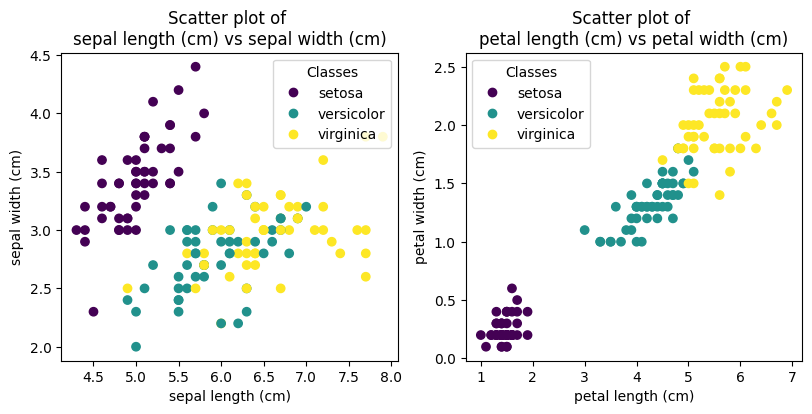

In [10]:
# Let's see what this data looks like
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(141)
# Because we can only plot two features at a time
# Let us take the first two columns ...
ax.set_title(label=f'Scatter plot of \n{iris_df.columns[0]} vs {iris_df.columns[1]}')
scatter = ax.scatter(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], c=y)
ax.set_xlabel(xlabel=iris_df.columns[0])
ax.set_ylabel(ylabel=iris_df.columns[1])
ax.legend(scatter.legend_elements()[0], iris_classes, title='Classes')

ax = fig.add_subplot(142)
# ... now plot the second two columns 
ax.set_title(label=f'Scatter plot of \n{iris_df.columns[2]} vs {iris_df.columns[3]}')
scatter = ax.scatter(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], c=y)
ax.set_xlabel(xlabel=iris_df.columns[2])
ax.set_ylabel(ylabel=iris_df.columns[3])
ax.legend(scatter.legend_elements()[0], iris_classes , title='Classes')
plt.show()

In [11]:
# Because PyTorch expects its data as torch tensor, we need to convert the X from numpy array to torch tensor
print(f'The Data type of X before converting is: {type(X)}')

X = torch.tensor(X, dtype=torch.float32, device=device)
print(f'The Data type of X after converting is: {type(X)}')
print(f'This is the first 10 samples/rows from X after conversion: \nConsider these X1, X2, X3, X4\n\n{X[:10]} ')

The Data type of X before converting is: <class 'numpy.ndarray'>
The Data type of X after converting is: <class 'torch.Tensor'>
This is the first 10 samples/rows from X after conversion: 
Consider these X1, X2, X3, X4

tensor([[6.3000, 2.3000, 4.4000, 1.3000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000]], device='cuda:0') 


In [12]:
# Similarly to the features (the Xs above), we need to convert the labels to a torch tensor
print(f'The Data type of y before converting is: {type(y)}')

y = torch.tensor(y, dtype=torch.long, device=device)
print(f'The Data type of X after converting is: {type(y)}', end='\n\n')
print(f'This is the first 10 samples/rows from y after conversion: \n{y[:10]} ')

The Data type of y before converting is: <class 'numpy.ndarray'>
The Data type of X after converting is: <class 'torch.Tensor'>

This is the first 10 samples/rows from y after conversion: 
tensor([1, 2, 0, 1, 0, 1, 1, 1, 0, 1], device='cuda:0') 


### Simple Neural Net   
This simple net has four featrues x1, x2, X1_2 and x2_2. It also has two hidden layers. The first hidden layer has two neurons. The second hidden layer has four neurons. Finally, we have an output of three neuron. This represents a multi classification (multiclass) problem. Because there are three neurons it also means we have three classes.  

Go ahead and experiment in the Tensorflow playground: https://playground.tensorflow.org/

<img style="max-width:50em; height:auto;" src="../graphics/lab_image_from_tf_playground.png" alt="Sample Neural Net" width="800"/>

The number of neurons and layers are totally arbitrary at this point. We could be more selective with out hyperparameters. However, that is not an issue for what we are trying to do.  

### Step 3:  
Construct our neural net and interpret the untrained model   

In [13]:
# With our data in place, we can now build our neural network
class MyClassifier(nn.Module):
    def __init__(self, ):
        super(MyClassifier, self).__init__()
        # Define the first hidden layer
        # It expects 4 features coming in. These are the X1, X2 and X3 from above
        # It will then emit 8 neurons
        self.fc1 = nn.Linear(in_features=4, out_features=8, bias=True)

        # Define the second hidden layer
        # It takes the 8 outputs from the previous layer and emits 8 neurons
        self.fc2 = nn.Linear(in_features=8, out_features=8, bias=True)

        # Setup the final layer - the output
        # It accepts the 8 outputs from the previous layer and produces 3 output
        self.fc3 = nn.Linear(in_features=8, out_features=3, bias=True)

    def forward(self, x):
        # x represents the input data
        # Apply the first layer to the input data
        x = self.fc1(input=x)

        # Apply the ReLU activation function to add non-linearity
        x = F.relu(input=x, inplace=False)

        # Apply the second layer, to the output from the first hidden layer, after the activation has been applied
        x = self.fc2(input=x)

        # Apply the ReLU activation function to add non-linearity
        x = F.relu(input=x, inplace=False)

        # Apply the final output from the previous layer as input to the output layer
        x = self.fc3(input=x)

        # Because we want the output to be probabilities, we use the Sigmoid activation at the output
        x = F.softmax(input=x, dim=-1)

        return x

In [14]:
# Set the manual seed
torch.manual_seed(seed=10)

# Instantiate the object ...
# ... and assign it to the device 
my_classifier = MyClassifier().to(device=device)
my_classifier

MyClassifier(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)

In [15]:
# Look at the model parameters, i.e. the weights and bias. The w and b in w*x + b
my_classifier.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.0419, -0.0171, -0.1875,  0.1150],
                      [-0.2861, -0.0882,  0.1938,  0.4693],
                      [ 0.1178, -0.1696,  0.0479, -0.0560],
                      [ 0.2041,  0.0573,  0.1959,  0.4849],
                      [-0.2076, -0.0177,  0.1150, -0.0033],
                      [-0.0479, -0.4425, -0.4313, -0.4499],
                      [-0.4892, -0.4657, -0.3788, -0.4510],
                      [-0.4690,  0.2192,  0.3067,  0.3379]], device='cuda:0')),
             ('fc1.bias',
              tensor([ 0.2694,  0.1694,  0.2203, -0.2765,  0.4502, -0.0345,  0.4314,  0.1533],
                     device='cuda:0')),
             ('fc2.weight',
              tensor([[ 0.2767,  0.2820, -0.0739, -0.1028,  0.0532, -0.0150,  0.0553,  0.1794],
                      [-0.2763, -0.0162, -0.2775,  0.3414, -0.2487,  0.0676, -0.0966,  0.2010],
                      [ 0.0012, -0.0356,  0.2588,  0.3229, -0.2566, -0.3410,  0.0295,  0.11

In [16]:
# Feed the first 10 records into the network, to ensure it works 
# In this case, we have three neurons as the output. 
# This is a multiclass problem.
# Getting the preds from the untrained network
untrained_preds = my_classifier(X)
untrained_preds[:10]

tensor([[0.4272, 0.3401, 0.2327],
        [0.4358, 0.3317, 0.2325],
        [0.3897, 0.3772, 0.2332],
        [0.4245, 0.3426, 0.2329],
        [0.3877, 0.3791, 0.2331],
        [0.4110, 0.3559, 0.2331],
        [0.4307, 0.3367, 0.2326],
        [0.4175, 0.3495, 0.2330],
        [0.3886, 0.3782, 0.2331],
        [0.4209, 0.3462, 0.2330]], device='cuda:0', grad_fn=<SliceBackward0>)

In [17]:
# Grab the model's predictions
untrained_preds = torch.argmax(untrained_preds, dim=-1).cpu().numpy()
untrained_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# What is the accuracy on the untrained model
( untrained_preds == y.cpu().numpy() ).sum() / len(y.cpu().numpy())

np.float64(0.31333333333333335)

In [19]:
# Interesting the untrained model has 147 out of 150 items predicted as 0 and 2 predicted as 1. 
np.unique(untrained_preds, return_counts=True)

(array([0, 1]), array([147,   3]))

In [20]:
# However, what is 0 and 1?
# Let us get back the labels
iris_classes[0].item(), iris_classes[1].item()

('setosa', 'versicolor')

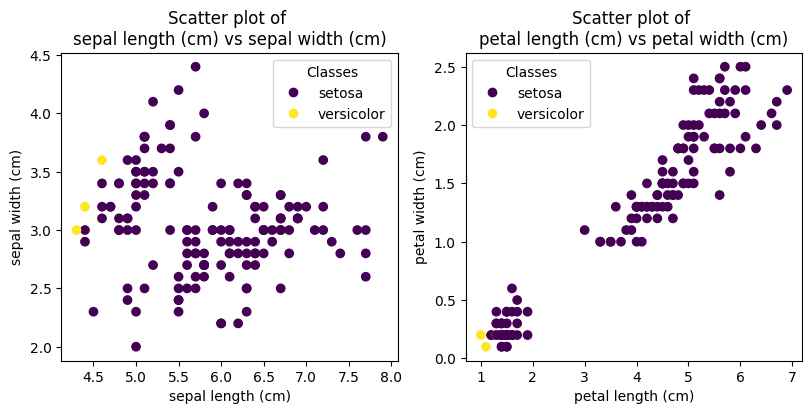

In [21]:
# Let's see what this data looks like
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(141)
# Because we can only plot two features at a time
# Let us take the first two columns ...
ax.set_title(label=f'Scatter plot of \n{iris_df.columns[0]} vs {iris_df.columns[1]}')
scatter = ax.scatter(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], c=untrained_preds)
ax.set_xlabel(xlabel=iris_df.columns[0])
ax.set_ylabel(ylabel=iris_df.columns[1])
ax.legend(scatter.legend_elements()[0], iris_classes, title='Classes')

ax = fig.add_subplot(142)
# ... now plot the second two columns 
ax.set_title(label=f'Scatter plot of \n{iris_df.columns[2]} vs {iris_df.columns[3]}')
scatter = ax.scatter(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], c=untrained_preds)
ax.set_xlabel(xlabel=iris_df.columns[2])
ax.set_ylabel(ylabel=iris_df.columns[3])
ax.legend(scatter.legend_elements()[0], iris_classes , title='Classes')
plt.show()

As can be seen above, the majority of the points are predicted as *Setosa*. Additionally, it was only able to identify two of the 3 classes.  

Let us train the model to fix that issue   

### Step 4:   
Train and interpret the trained model  

In [22]:
# To train the model to fix learn the pattern, we define a train loop

# First determine how many times we would like to go through this loop.
# This is determined by the number of epochs
num_epochs = 200

# We then need a loss function.
# Because we use the softmax activation in the last layer of the network above
# we will use cross-entropy loss

loss_fn = nn.CrossEntropyLoss()

# Finally, and critically, we need an optimizer
# This is what performs the gradient descent
optimizer = torch.optim.AdamW(params=my_classifier.parameters(), lr=0.1)

# Put the model in train state
# Not needed but goo habit
my_classifier.train(mode=True)

# Start the training loop
print(f'Training for: {num_epochs} epochs:')
for epoch in range(num_epochs):
    
    # Get the model's initial prediction
    y_preds = my_classifier(X)

    # calculate the loss. 
    # Remember, the loss is the difference between the true value and the predicted value
    loss = loss_fn(input=y_preds, target=y)

    # Now that we have the predictions, compare how the model has performed
    # Calculate the accuracy
    accuracy = (torch.argmax(y_preds.detach(), dim=-1) == y).sum()/y.size(dim=0)

    # Calculate the derivatives of the loss with respect to the parameters
    # This is where the backpropagation comes in
    loss.backward()

    # Finally, update the parameters
    optimizer.step()

    # Let's start by clearing any gradients that might be there
    my_classifier.zero_grad(set_to_none=True)

    if epoch %10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs} \t | accuracy: {accuracy:.4f} \t | loss {loss:.4f}')
    

Training for: 200 epochs:
Epoch: 1/200 	 | accuracy: 0.3133 	 | loss 1.1128
Epoch: 11/200 	 | accuracy: 0.6667 	 | loss 0.8107
Epoch: 21/200 	 | accuracy: 0.9600 	 | loss 0.6420
Epoch: 31/200 	 | accuracy: 0.9733 	 | loss 0.5839
Epoch: 41/200 	 | accuracy: 0.9733 	 | loss 0.5762
Epoch: 51/200 	 | accuracy: 0.9800 	 | loss 0.5714
Epoch: 61/200 	 | accuracy: 0.9800 	 | loss 0.5703
Epoch: 71/200 	 | accuracy: 0.9800 	 | loss 0.5695
Epoch: 81/200 	 | accuracy: 0.9867 	 | loss 0.5695
Epoch: 91/200 	 | accuracy: 0.9600 	 | loss 0.5891
Epoch: 101/200 	 | accuracy: 0.9867 	 | loss 0.5696
Epoch: 111/200 	 | accuracy: 0.9867 	 | loss 0.5708
Epoch: 121/200 	 | accuracy: 0.9867 	 | loss 0.5689
Epoch: 131/200 	 | accuracy: 0.9800 	 | loss 0.5695
Epoch: 141/200 	 | accuracy: 0.9867 	 | loss 0.5708
Epoch: 151/200 	 | accuracy: 0.9800 	 | loss 0.5703
Epoch: 161/200 	 | accuracy: 0.9867 	 | loss 0.5687
Epoch: 171/200 	 | accuracy: 0.9867 	 | loss 0.5696
Epoch: 181/200 	 | accuracy: 0.9800 	 | loss 0.57

In [23]:
# Grab the trained model's predictions
trained_preds = torch.argmax(my_classifier(X).detach().cpu(), dim=-1).numpy()
trained_preds

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 1,
       2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

In [24]:
# Looks like above our predictions are very good. This is inline with our accuracy
(torch.argmax(my_classifier(X), dim=-1) == y).sum()/y.size(dim=0)

tensor(0.9867, device='cuda:0')

### Step 4:  
Visualize the trained model   

In [25]:
X.cpu()[:, 0]

tensor([6.3000, 6.4000, 5.4000, 6.1000, 5.0000, 5.0000, 6.3000, 5.8000, 5.1000,
        5.7000, 5.6000, 5.8000, 5.5000, 4.9000, 5.1000, 6.8000, 6.0000, 4.4000,
        5.1000, 5.0000, 7.1000, 6.4000, 6.2000, 4.8000, 5.9000, 4.7000, 5.7000,
        5.5000, 6.8000, 7.7000, 6.6000, 6.2000, 7.2000, 5.8000, 6.3000, 4.6000,
        6.7000, 6.9000, 7.7000, 6.9000, 5.0000, 5.0000, 5.2000, 4.5000, 6.3000,
        5.2000, 6.9000, 5.9000, 5.6000, 6.7000, 6.2000, 7.2000, 5.5000, 6.0000,
        6.4000, 5.8000, 5.3000, 6.1000, 5.4000, 6.4000, 4.7000, 4.6000, 4.9000,
        5.1000, 6.7000, 4.9000, 6.9000, 4.8000, 5.8000, 6.0000, 4.4000, 6.8000,
        7.9000, 6.5000, 7.6000, 6.3000, 4.6000, 5.7000, 6.7000, 5.7000, 4.9000,
        6.4000, 7.0000, 5.7000, 5.0000, 5.4000, 5.1000, 5.4000, 7.4000, 6.3000,
        6.6000, 5.0000, 5.1000, 5.1000, 6.5000, 5.8000, 6.1000, 5.5000, 6.5000,
        6.5000, 5.9000, 6.1000, 6.4000, 5.2000, 4.8000, 5.6000, 5.1000, 4.6000,
        6.1000, 5.0000, 5.7000, 5.2000, 

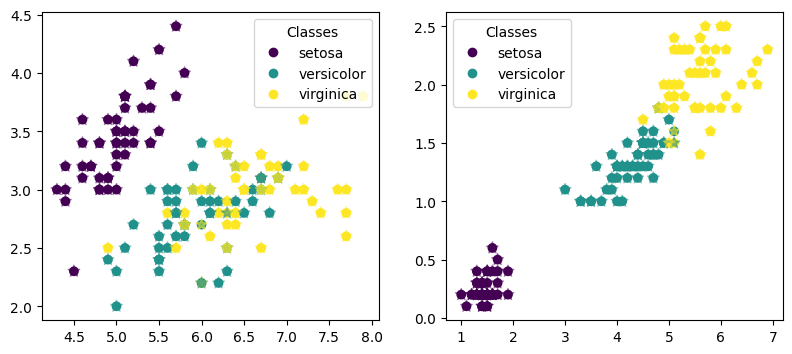

In [26]:
# Let's see what this data looks like
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(141)
scatter = ax.scatter(x=X.cpu()[:, 0], y=X.cpu()[:, 1], c=y.cpu(), )
ax.scatter(x=X.cpu()[:, 0], y=X.cpu()[:, 1], c=trained_preds, marker='*', s=75, alpha=0.5)
ax.legend(scatter.legend_elements()[0], iris_classes, title='Classes')

ax = fig.add_subplot(142)
scatter = ax.scatter(x=X.cpu()[:, 2], y=X.cpu()[:, 3], c=y.cpu())
ax.scatter(x=X.cpu()[:, 2], y=X.cpu()[:, 3], c=trained_preds, marker='*', s=75, alpha=0.5)
ax.legend(scatter.legend_elements()[0], iris_classes, title='Classes')

plt.show()

### Step 5:   
Save the trained model   

In [27]:
# WIth this confirmation that the model is working well, let us save it
torch.save(obj=my_classifier, f=r'/tmp/my_classifier.pth')

#with open(file=r'/tmp/my_classifier.pkl', mode='wb') as fp:
#    pickle.dump(obj=my_classifier, file=fp)

# Verify the file was created
!ls /tmp/my_classifier.*

# Validate the file integrity
!md5sum /tmp/my_classifier.*

/tmp/my_classifier.pth
d872b84921ea7d7ea6b9e444722c3513  /tmp/my_classifier.pth


In [28]:
# With the training finish clear the GPU cache
# Setup the device to work with
if torch.cuda.is_available():
    # For CUDA GPU
    print(f'Cleaning {device} cache')
    torch.cuda.empty_cache()
elif torch.backends.mps.is_available():
    # For Apple devices
    print(f'Cleaning {device} cache')
    torch.mps.empty_cache()
else:
    # Default to cpu
    pass

Cleaning cuda cache


### Lab Takeaways:  
- We built a neural network that consists of an input layer, 2 hidden layers and an output layer  
- We learnt how to make predictions for multi-class problems  
- We saw how to analyze an untrained model   
- We got a glimpse into how to interpret a trained model  
- We learnt how to save a model 
- We also learnt how to run external commands within Jupyter